## Word2Vec 직접 구현

In [71]:
doc = 'you will never know until you try'

In [72]:
# 1. 입력 문장 토큰화

tokens = doc.split()
tokens

['you', 'will', 'never', 'know', 'until', 'you', 'try']

In [73]:
# 2. 가중치 행렬 초기화

V = len(set(tokens))    # 유니크한 차원 수
N = 4   # 임베딩 차원 수

import numpy as np

W1 = np.random.rand(V, N)
W2 = np.random.rand(N, V)

print(W1)
print(W2)

[[0.95915803 0.68978408 0.87905202 0.97154264]
 [0.34889123 0.91552553 0.88656829 0.08990094]
 [0.56264967 0.92152409 0.65932122 0.25801522]
 [0.00658675 0.72899116 0.4907581  0.78727112]
 [0.49207835 0.10949236 0.18137136 0.0021402 ]
 [0.22672573 0.66051226 0.87224151 0.74367272]]
[[0.78514527 0.65988424 0.53417899 0.58509299 0.91039532 0.68323313]
 [0.44105766 0.36433105 0.90015231 0.82214868 0.24658978 0.69153492]
 [0.25705381 0.63012061 0.05510312 0.60605213 0.2809558  0.6643391 ]
 [0.99108847 0.8492324  0.15789633 0.89164393 0.48309053 0.05354499]]


In [74]:
one_hot_vector = np.eye(V)
word2idx = {v: i for i, v in enumerate(set(tokens))}
one_hot_vector, word2idx

(array([[1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 1.]]),
 {'know': 0, 'until': 1, 'never': 2, 'try': 3, 'you': 4, 'will': 5})

In [76]:
# 학습을 위한 데이터 구축
training_data = [
    # [target_word, (context_words)]
]

window_size = 1
for i, token in enumerate(tokens):
    target_word = token
    context_words = []
    if i-1 >= 0 :
        context_words.append(tokens[i-1])
    
    if i + 1 < len(tokens):
        context_words.append(tokens[i+1])
    training_data.append([target_word, context_words])
training_data

[['you', ['will']],
 ['will', ['you', 'never']],
 ['never', ['will', 'know']],
 ['know', ['never', 'until']],
 ['until', ['know', 'you']],
 ['you', ['until', 'try']],
 ['try', ['you']]]

In [77]:
# 학습

learning_rate = 0.01
loss_list = []
for epoch in range(100):
    loss_total = 0
    for target_word, context_words in training_data:
        # Feed Forward
        # 1. Input - Hidden
        for word in context_words:
            hidden_vector = one_hot_vector[word2idx[word], :].reshape(1, V).dot(W1)
            # print(hidden_vector)

            # 2. Hidden - Output
            output_vector = hidden_vector.dot(W2) #  1 X 6 행렬

            # Activation Function (Softmax)
            def softmax(x):
                return np.exp(x) / np.sum(np.exp(x))

            y_hat = softmax(output_vector)
            y_real = one_hot_vector[word2idx[target_word], :] # (6, )
            
            # 3. Loss 계산 Cross Entropy loss
            loss = -np.sum(y_real * np.log(y_hat))

            loss_total += loss

            # 4. Backpropagation
            gradient_w2 = hidden_vector.T.dot(y_hat - y_real)   # 1X4 * 1X6 -> 4X6
            # print(gradient_w2)

            # one_hot_vector -> 1x6
            # w2 -> 4x6
            # y_hat-y_real -> 1x6
            # 4X1.T -> 1x4

            gradient_w1 = (y_hat-y_real).dot(W2.T)

            W1[word2idx[word], :] -= learning_rate * gradient_w1.ravel()
            W2 -= learning_rate * gradient_w2

            # W1 특정 부분만 업데이트 (1X4)
    loss_list.append(loss_total)
W1, W2

(array([[ 1.03569267,  0.59733846,  0.73778984,  1.05336689],
        [ 0.41885561,  0.95955556,  0.93068527,  0.44114061],
        [ 0.68776222,  0.94140179,  0.68317252, -0.30109569],
        [ 0.00920844,  0.75723133,  0.65421671,  0.94887318],
        [ 0.40245837, -0.4431569 ,  0.22405364, -0.36553909],
        [ 0.18328264,  1.02583283,  0.79672356,  0.82962095]]),
 array([[ 0.787885  ,  1.07239894,  0.68998588,  0.3658366 ,  0.38119539,
          0.86062814],
        [ 0.93644541, -0.07478914,  1.03520665,  0.0133909 ,  0.96580118,
          0.5897594 ],
        [ 0.42306991,  0.49307402,  0.25275029,  0.02839539,  0.76849028,
          0.52784467],
        [ 0.49274361,  0.94102359,  0.97078381,  0.30961655,  1.15596182,
         -0.44363274]]))

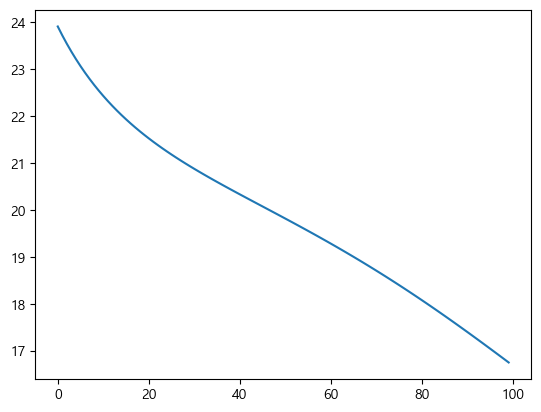

In [78]:
import matplotlib.pyplot as plt

plt.plot(loss_list)
plt.show()

## Word2Vec 대용량 데이터 처리

In [79]:
import zipfile

In [80]:
zf = zipfile.ZipFile('./data/simpsons_dataset.csv.zip')

In [81]:
# 압축 해제
zf.extractall('./')

In [82]:
import pandas as pd

simpsons_df = pd.read_csv('./simpsons_dataset.csv')
simpsons_df.head(2).T

0  \
raw_character_text                                        Miss Hoover   
spoken_words        No, actually, it was a little of both. Sometim...   

                                         1  
raw_character_text            Lisa Simpson  
spoken_words        Where's Mr. Bergstrom?

In [83]:
sents = simpsons_df['spoken_words']
sents

0         No, actually, it was a little of both. Sometim...
1                                    Where's Mr. Bergstrom?
2         I don't know. Although I'd sure like to talk t...
3                                That life is worth living.
4         The polls will be open from now until the end ...
                                ...                        
158309                                            I'm back.
158310    You see, class, my Lyme disease turned out to ...
158311                                   Psy-cho-so-ma-tic.
158312                       Does that mean you were crazy?
158313                    No, that means she was faking it.
Name: spoken_words, Length: 158314, dtype: object

In [84]:
len(sents)

158314

In [85]:
# EDA

simpsons_df.isna().sum()

raw_character_text    17814
spoken_words          26459
dtype: int64

In [86]:
sents = simpsons_df['spoken_words'].dropna()

In [87]:
simpsons_df.isna().sum()

raw_character_text    17814
spoken_words          26459
dtype: int64

In [88]:
len(sents)

131855

In [89]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [90]:
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [91]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer

sw = stopwords.words()
wnl = WordNetLemmatizer()
ps = PorterStemmer()

def preprocess(sent):
    # 문장부호 제거  https://www.nltk.org/api/nltk.tokenize.regexp.html
    sent = re.sub('[^\w \']+','', sent)

    # lower()
    sent = sent.lower()

    # 토크나이즈, 불용어 처리, 원형 복원 
    tokens = [wnl.lemmatize(token) 
        for token in word_tokenize(sent) if token not in sw] # list

    return tokens

In [92]:
# 멀티프로세싱 사용해볼 만한 지점
# 각각의 문장에 독립적으로 함수를 적용하고 그 결과를 합치면 되기 때문

In [93]:
import re
tokens = sents.apply(preprocess)
tokens

0              [disease, magazine, news, show, 's, natural]
1                                       ['s, mr, bergstrom]
2          [n't, 'd, talk, n't, touch, lesson, plan, teach]
3                                     [life, worth, living]
4         [poll, open, recess, case, decided, put, 'll, ...
                                ...                        
158309                                           ['m, back]
158310                       [class, lyme, disease, turned]
158311                                      [psychosomatic]
158312                                              [crazy]
158313                                       [mean, faking]
Name: spoken_words, Length: 131855, dtype: object

In [94]:
total_tokens = []

[total_tokens.extend(sent_token) for sent_token in tokens]

print()

In [95]:
for sent_token in tokens:
    print(sent_token)

['disease', 'magazine', 'news', 'show', "'s", 'natural']
["'s", 'mr', 'bergstrom']
["n't", "'d", 'talk', "n't", 'touch', 'lesson', 'plan', 'teach']
['life', 'worth', 'living']
['poll', 'open', 'recess', 'case', 'decided', 'put', "'ll", 'final', 'statement', 'martin']
["n't", "'s", 'left']
['bart']
['victory', 'party', 'slide']
['mr', 'bergstrom', 'mr', 'bergstrom']
['hey', 'hey', 'moved', 'morning', 'job', 'copernicus', 'costume']
['find']
["'s", 'taking', 'train', 'capital', 'city']
['train', 'traditional', 'environmentally', 'sound']
["'s", 'backbone', 'country', 'leland', 'stanford', 'drove', 'golden', 'spike', 'promontory', 'point']
['touched']
['hey', 'vote']
["n't", 'vote', 'voting', "'s", 'geek']
['vote', 'girl']
['forgot']
["n't", 'sweat', 'long', 'couple', 'milhouse']
['uh']
['lewis']
['voted']
['bart', "n't", 'vote']
['uh']
['yayyyyyyyyyyyyyy']
['demand', 'recount']
['martin', 'martin', 'recount']
[]
['make', 'martin', 'martin']
['mister', 'president']
['boarding', 'track', '

In [96]:
len(total_tokens), len(set(total_tokens))

(562182, 39496)

In [97]:
V = len(set(total_tokens))
N = 64

In [98]:
# 단어 분포, 단어 to index 딕셔너리 생성

# 단어 분포
# 단어: 빈도, 비율
from collections import Counter
counter = Counter(total_tokens)

# 단어 인덱스
# 단어: 인덱스 
word2idx = {k: i for i, k in enumerate(set(total_tokens))}
word2idx, len(word2idx)

({'yahaha': 0,
  'springfeld': 1,
  'stringy': 2,
  'neurotic': 3,
  'gregarious': 4,
  'meiji': 5,
  'paint': 6,
  'nnnow': 7,
  'intolerably': 8,
  'giantslayers': 9,
  'tiens': 10,
  'merrily': 11,
  'nether': 12,
  'oeuvre': 13,
  'parting': 14,
  'mvp': 15,
  'boatload': 16,
  'lathe': 17,
  'mmhm': 18,
  'losin': 19,
  'activator': 20,
  'unsolicited': 21,
  "he'sdingalingaling": 22,
  'staff': 23,
  'watering': 24,
  'docile': 25,
  "sock'em": 26,
  'morty': 27,
  'stopping': 28,
  'kazini': 29,
  'midge': 30,
  'pfffft': 31,
  'kablamo': 32,
  'forgetmeshot': 33,
  'lesion': 34,
  'stratagem': 35,
  'fiendishly': 36,
  'ventis': 37,
  'duffel': 38,
  'battlestar': 39,
  'burnin': 40,
  'sugarfree': 41,
  'casanova': 42,
  'fatneck': 43,
  'beret': 44,
  'highwayman': 45,
  'seventynineyearold': 46,
  'donotgo': 47,
  'depend': 48,
  'presumptuous': 49,
  'matrimonium': 50,
  'ziggety': 51,
  'egotism': 52,
  'flimpsons': 53,
  'sixmonth': 54,
  'pooting': 55,
  'tanager': 56,
 

In [99]:
counter

Counter({'disease': 45,
         'magazine': 127,
         'news': 301,
         'show': 1177,
         "'s": 27834,
         'natural': 75,
         'mr': 1944,
         'bergstrom': 19,
         "n't": 15946,
         "'d": 2268,
         'talk': 659,
         'touch': 158,
         'lesson': 176,
         'plan': 265,
         'teach': 204,
         'life': 1360,
         'worth': 156,
         'living': 197,
         'poll': 17,
         'open': 370,
         'recess': 13,
         'case': 230,
         'decided': 88,
         'put': 1055,
         "'ll": 6166,
         'final': 112,
         'statement': 21,
         'martin': 132,
         'left': 555,
         'bart': 3566,
         'victory': 34,
         'party': 457,
         'slide': 46,
         'hey': 4276,
         'moved': 66,
         'morning': 322,
         'job': 645,
         'copernicus': 5,
         'costume': 70,
         'find': 899,
         'taking': 321,
         'train': 107,
         'capital': 74,
        

In [100]:
len_tokens = len(total_tokens)

In [101]:
len_tokens

562182

In [102]:
counter_prob = {k: (v/len_tokens)**0.75 for k, v in counter.items()}
counter_prob

{'disease': 0.0008462558485943119,
 'magazine': 0.0018426594915746043,
 'news': 0.0035197933751447696,
 'show': 0.009787564678076371,
 "'s": 0.10496004664124607,
 'natural': 0.0012413328411298445,
 'mr': 0.014259834768363663,
 'bergstrom': 0.0004432589348953269,
 "n't": 0.0691164013182714,
 "'d": 0.01600753962353178,
 'talk': 0.006335142071482868,
 'touch': 0.0021706265614103142,
 'lesson': 0.002353568260731883,
 'plan': 0.0031990918049548634,
 'teach': 0.0026291473299173505,
 'life': 0.010908033903716786,
 'worth': 0.002149986567659047,
 'living': 0.0025611910024521795,
 'poll': 0.00040778288008606623,
 'open': 0.004109070483965752,
 'recess': 0.00033346465781129237,
 'case': 0.0028766576176875776,
 'decided': 0.0013994400606534673,
 'put': 0.00901636828206844,
 "'ll": 0.033891823663121656,
 'final': 0.0016768947878387668,
 'statement': 0.00047781168783114417,
 'martin': 0.0018968052641075337,
 'left': 0.005569446483428293,
 'bart': 0.022476480196998994,
 'victory': 0.0006858063241324

In [103]:
tp = sum(counter_prob.values())
tp

8.877533074993195

In [104]:
counter_prob = {k: v/tp for k, v in counter_prob.items()}
counter_prob

{'disease': 9.532556414552818e-05,
 'magazine': 0.00020756436230748898,
 'news': 0.0003964832736089206,
 'show': 0.0011025095142305481,
 "'s": 0.011823109613289334,
 'natural': 0.00013982857970155137,
 'mr': 0.0016062834852771971,
 'bergstrom': 4.993041773552239e-05,
 "n't": 0.0077855414037220445,
 "'d": 0.001803151786460007,
 'talk': 0.0007136151471322706,
 'touch': 0.00024450785404840387,
 'lesson': 0.00026511512160529876,
 'plan': 0.0003603581961261592,
 'teach': 0.00029615742433258867,
 'life': 0.001228723544206581,
 'worth': 0.00024218288453526206,
 'living': 0.00028850255817877,
 'poll': 4.5934256357178233e-05,
 'open': 0.00046286174878249067,
 'recess': 3.756276152331294e-05,
 'case': 0.0003240379498884359,
 'decided': 0.00015763839445391648,
 'put': 0.001015638939996329,
 "'ll": 0.0038177073942523873,
 'final': 0.00018889197862437162,
 'statement': 5.3822574784550767e-05,
 'martin': 0.00021366355361159694,
 'left': 0.0006273642053913228,
 'bart': 0.002531838519454485,
 'victory

In [105]:
import numpy as np
# negative sampling
# target_word랑 같은건 제외
np.random.choice(np.array([word2idx[k] for k in counter_prob]), 3, p=list(counter_prob.values()))

array([21860,   291,  3030])

In [106]:
np.array(counter_prob.values()).shape

()

In [107]:
# 가중치 랜덤 초기화

V = len(set(total_tokens))    # 유니크한 차원 수
N = 64   # 임베딩 차원 수

import numpy as np

W1 = np.random.rand(V, N)
W2 = np.random.rand(N, V)

W1.shape, W2.shape

((39496, 64), (64, 39496))

In [108]:
# 학습 데이터셋 구축
training_data = [
    # [target_word, (context_words)]
]

window_size = 1
for sent_token in tokens: # 토큰화된 문장 들 [[문장 1 토큰들], [문장 2 토큰들], ...]
    for i, token in enumerate(sent_token): # [토큰1, 토큰2, 토큰3, ...]
        if len(sent_token) > 1: # 토큰이 하나만 있는 경우 제외
            target_word = token
            # context_words = []
            if i-1 >= 0:
                # context_words.append(sent_token[i-1])
                training_data.append((word2idx[target_word], word2idx[sent_token[i-1]]))
            if i+1 < len(sent_token):
                # context_words.append(sent_token[i+1])
                training_data.append((word2idx[target_word], word2idx[sent_token[i+1]]))
            # training_data.append([target_word, context_words])
# 타겟 단어, [문맥 단어들]
# 위의 데이터 구조에서
# 타겟 단어, 문맥 단어 1
# 타겟 단어, 문맥 단어 2
# 이런 데이터 구조로 바꾼 이유?
training_data

# 타겟단어, 문맥 단어 # 1개 로우
# 64 개 뽑으면 타겟단어x64 문맥단어x64

[(2851, 34513),
 (34513, 2851),
 (34513, 35362),
 (35362, 34513),
 (35362, 22966),
 (22966, 35362),
 (22966, 30733),
 (30733, 22966),
 (30733, 8997),
 (8997, 30733),
 (30733, 11043),
 (11043, 30733),
 (11043, 15741),
 (15741, 11043),
 (11188, 6481),
 (6481, 11188),
 (6481, 25016),
 (25016, 6481),
 (25016, 11188),
 (11188, 25016),
 (11188, 34826),
 (34826, 11188),
 (34826, 5782),
 (5782, 34826),
 (5782, 17145),
 (17145, 5782),
 (17145, 14230),
 (14230, 17145),
 (5779, 33633),
 (33633, 5779),
 (33633, 36351),
 (36351, 33633),
 (18672, 14543),
 (14543, 18672),
 (14543, 9967),
 (9967, 14543),
 (9967, 34025),
 (34025, 9967),
 (34025, 22400),
 (22400, 34025),
 (22400, 16026),
 (16026, 22400),
 (16026, 291),
 (291, 16026),
 (291, 25969),
 (25969, 291),
 (25969, 11653),
 (11653, 25969),
 (11653, 13986),
 (13986, 11653),
 (11188, 30733),
 (30733, 11188),
 (30733, 36542),
 (36542, 30733),
 (8684, 25275),
 (25275, 8684),
 (25275, 27497),
 (27497, 25275),
 (11043, 15741),
 (15741, 11043),
 (15741,

In [109]:
# shuttle

batch_size = 64
# [인덱스들 * 64]

batch_dataset = [
    # [(target, context), (target2, context2)],  # batch (batch_size)
    # [(target, context), (target2, context2)],
    # [(target, context), (target2, context2)],
    # training_data[batch_size*i : batch_size*(i+1)] 도 가능
    training_data[i:i+batch_size]
    for i in range(0, len(training_data), batch_size)
]

# 0*64:1*64 -> 0:64
# 1*64:2*64 -> 64:128

In [110]:
len(training_data)

876810

In [111]:
len(batch_dataset)

13701

In [112]:
batch_dataset[0]

[(2851, 34513),
 (34513, 2851),
 (34513, 35362),
 (35362, 34513),
 (35362, 22966),
 (22966, 35362),
 (22966, 30733),
 (30733, 22966),
 (30733, 8997),
 (8997, 30733),
 (30733, 11043),
 (11043, 30733),
 (11043, 15741),
 (15741, 11043),
 (11188, 6481),
 (6481, 11188),
 (6481, 25016),
 (25016, 6481),
 (25016, 11188),
 (11188, 25016),
 (11188, 34826),
 (34826, 11188),
 (34826, 5782),
 (5782, 34826),
 (5782, 17145),
 (17145, 5782),
 (17145, 14230),
 (14230, 17145),
 (5779, 33633),
 (33633, 5779),
 (33633, 36351),
 (36351, 33633),
 (18672, 14543),
 (14543, 18672),
 (14543, 9967),
 (9967, 14543),
 (9967, 34025),
 (34025, 9967),
 (34025, 22400),
 (22400, 34025),
 (22400, 16026),
 (16026, 22400),
 (16026, 291),
 (291, 16026),
 (291, 25969),
 (25969, 291),
 (25969, 11653),
 (11653, 25969),
 (11653, 13986),
 (13986, 11653),
 (11188, 30733),
 (30733, 11188),
 (30733, 36542),
 (36542, 30733),
 (8684, 25275),
 (25275, 8684),
 (25275, 27497),
 (27497, 25275),
 (11043, 15741),
 (15741, 11043),
 (15741,

In [115]:
# 학습 (배치 적용)

learning_rate = 0.01

loss_list = []
for epoch in range(100):
    loss_total = 0.0

    for batch in batch_dataset:
        # 학습
        for target_word, context_word in batch: # 64개씩
            # Feed Forward
            # 1. Input - Hidden (뽑아서 쓰는걸로 개선)
            hidden_vector = W1[context_word, :] # (64, )

            # Negative Sampling 추가

            # 2. Hidden - Output
            target_vector = hidden_vector.dot(W2[:, target_word]) # (1, 64) * (64, 1) => (1, 1)
            # print(target_vector)

            # Activation Function (Sigmoid)
            def sigmoid(x):
                return 1 / (1+np.exp(-x))

            y_hat = sigmoid(target_vector)
            y_real = 1

            # 3. Loss 계산 binary cross entropy loss
            loss = -y_real * np.log(y_hat) + (1-y_real)*np.log(1-y_hat)
            loss_total += loss

            # 4. Backpropagation
            gradient_w2 = hidden_vector.T.dot(y_hat - y_real) # 64x1 * 1x1 -> 64x1 -> w2[:, target_word]

            # w1 해당 단어 가중치만 업데이트 (1x64)
            gradient_w1 = (y_hat-y_real) * W2.T[target_word, :] # 1x 1 1x 64 -> 1x64
            # print(gradient_w1.shape)

            W1[context_word, :] -= learning_rate * gradient_w1
            W2[:, target_word] -= learning_rate * gradient_w2

    loss_list.append(loss_total)

In [116]:
loss_list

[0.39065230677601026,
 0.3902614748566969,
 0.38987407277017677,
 0.38949004523097247,
 0.3891093382009026,
 0.3887318988526443,
 0.38835767553425343,
 0.38798661773825055,
 0.3876186760681894,
 0.38725380220732114,
 0.3868919488891984,
 0.3865330698688112,
 0.3861771198940992,
 0.38582405467923064,
 0.3854738308779244,
 0.38512640605878434,
 0.38478173868063736,
 0.38443978806816986,
 0.3841005143896293,
 0.3837638786343256,
 0.3834298425905851,
 0.3830983688265173,
 0.3827694206682475,
 0.3824429621807052,
 0.38211895814928165,
 0.38179737406066433,
 0.3814781760854503,
 0.3811613310611096,
 0.38084680647474944,
 0.3805345704470516,
 0.3802245917170434,
 0.37991683962611605,
 0.3796112841039663,
 0.3793078956528308,
 0.3790066453350508,
 0.3787075047595276,
 0.3784104460669333,
 0.3781154419190227,
 0.37782246548478277,
 0.3775314904287263,
 0.37724249090008694,
 0.37695544151996063,
 0.37667031737151335,
 0.37638709398870307,
 0.37610574734607083,
 0.3758262538478968,
 0.37554859032

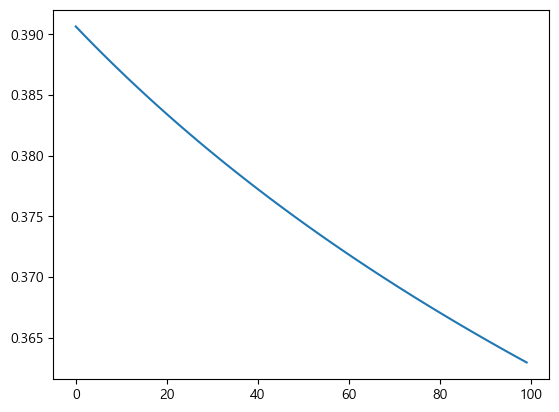

In [117]:
import matplotlib.pyplot as plt
plt.plot(loss_list)

# 1 Word2Vec

In [118]:
# 필요한 데이터를 불러와 it_df와 culture_df에 저장한다
import pandas as pd
it_df = pd.read_csv('./data/Word Representation_it.csv').dropna()
culture_df = pd.read_csv('./data/Word Representation_it.csv').dropna()

In [119]:
# word2vec을 하기 위한 전처리
# it_df와 culture_df의 컬럼 '1'의 토큰을 리스트 형태로 변경
it_token_ls = list(it_df.loc[:,'1'])
culture_token_ls = list(culture_df.loc[:,'1'])

total_token_ls = it_token_ls + culture_token_ls  # it_df의 리스트와 culture_df의 리스트를 한개로 합침

# 리스트의 값을 ','로 분리
total_token_ls = [tokens.split(',') for tokens in total_token_ls]
print(total_token_ls[0][:10])

['배', '정회', '신임', '과학기술', '일자리', '진흥', '원장', '아시아', '경제', '이민']


In [120]:
total_token_ls[0]

['배',
 '정회',
 '신임',
 '과학기술',
 '일자리',
 '진흥',
 '원장',
 '아시아',
 '경제',
 '이민',
 '우',
 '배',
 '정회',
 '전',
 '국립',
 '중앙',
 '과학',
 '관',
 '전시',
 '연구',
 '단장',
 '과학기술',
 '일자리',
 '진흥',
 '제',
 '원장',
 '취임',
 '과학기술',
 '정보',
 '통신',
 '같은',
 '인사',
 '발표',
 '임기',
 '날',
 '동안',
 '배',
 '신임',
 '원장',
 '행정',
 '고등고시',
 '공직',
 '입문',
 '교육',
 '과학기술',
 '부',
 '융합',
 '기술',
 '과장',
 '중앙대',
 '경영',
 '경제',
 '초빙교수',
 '과기',
 '정통부',
 '연구',
 '성과',
 '활용',
 '정책',
 '과장',
 '연구',
 '성과',
 '혁신',
 '기획',
 '과장',
 '과학기술',
 '정책',
 '수립',
 '정부',
 '연구개발',
 '연구',
 '기술',
 '이전',
 '사업',
 '두루',
 '경험',
 '보유',
 '평가',
 '배',
 '신임',
 '원장',
 '날',
 '환담',
 '회',
 '새로운',
 '임무',
 '조직',
 '신속히',
 '성하고',
 '직원',
 '역량',
 '강화하겠다',
 '며',
 '실험실',
 '유망',
 '기술',
 '전',
 '문',
 '기업',
 '연결하며',
 '기술',
 '이전',
 '효과',
 '지원',
 '신',
 '기술',
 '창업',
 '통한',
 '미래',
 '일자리',
 '많이',
 '창',
 '고',
 '이민',
 '우',
 '네이버',
 '홈',
 '아시아',
 '경제',
 '뉴스',
 '확인',
 '재미',
 '신기',
 '과학',
 '꿀',
 '잼',
 '인',
 '기',
 '만화',
 '경제',
 '눈',
 '세계',
 '창',
 '아시아',
 '경제',
 '전',
 '재']

In [ ]:
# gensim이라는 패키지에 word2Vec 클래스 사용
from gensim.models import Word2Vec
word2vec = Word2Vec( sentences = total_token_ls,      # 학습시킬 문장
                     vector_size = 10,         # 임베딩된 단어 벡터의 차원 크기
                     alpha = 0.025,     # 학습률(Learning rate)
                     min_count=2,       # 2번 미만 등장한 단어는 제외
                     window = 8,        # 문맥의 크기 (window_size)
                     sample = 0.001,    # sub-sampling
                     sg = 1,            # 0: CBOW, 1: Skip-gram
                     epochs = 10)       # 전체 문장 반복학습 횟수(epoch)

In [ ]:
# '인공'의 단어 임베딩
word_embedding = word2vec.wv.__getitem__('인공')
print(word_embedding)

# [ 1.0105355  -0.52829117 -0.18008213  0.16697505  1.0054952  -0.83417076
#   1.3217595  -0.09938464 -0.6107242  -0.28369704]

In [ ]:
# '데이터'의 단어 임베딩
word_embedding = word2vec.wv.__getitem__('데이터')
print(word_embedding)

# [-0.7001429   0.13424662  0.01299188 -0.09878565  1.3942353  -1.3213834
#   1.272475    0.691245   -0.82266414 -0.08505181]

In [ ]:
# '인공'과 유사도가 높은 단어
word_similar_1 = word2vec.wv.most_similar('인공')
print(word_similar_1)

#'데이터'와 유사도가 높은 단어
word_similar_2 = word2vec.wv.most_similar('데이터')
print(word_similar_2)


# [('지능', 0.9744399785995483), ('기기', 0.9626783132553101), ('형', 0.937897801399231), ('기능', 0.9196540117263794), ('이용', 0.910707414150238), ('블록', 0.9054185152053833), ('개발', 0.9017859697341919), ('커뮤니티', 0.9002499580383301), ('적용', 0.8971827030181885), ('프로젝트', 0.892350971698761)]
# [('빅', 0.9061788320541382), ('도심', 0.8727111220359802), ('센터', 0.8366978764533997), ('제공', 0.8364999890327454), ('웨이', 0.8347126841545105), ('환경', 0.8290132880210876), ('화', 0.816045880317688), ('앤', 0.8119009137153625), ('투명', 0.8060135245323181), ('엔터테인먼트', 0.8036418557167053)]

In [ ]:
word2vec.wv['너지']

# 2 GloVe

- 더이상 지원하지 않음

In [ ]:
# !pip install glove_python_binary

# from glove import Corpus, Glove

# corpus = Corpus()
# corpus.fit(total_token_ls, window=5)
# # 훈련 데이터로부터 GloVe에서 사용할 동시 등장 행렬 생성

# glove = Glove(no_components=100, learning_rate=0.05)
# glove.fit(corpus.matrix, epochs=20, no_threads=4, verbose=True)
# glove.add_dictionary(corpus.dictionary)
# # 학습에 이용할 쓰레드의 개수는 4로 설정, 에포크는 20.

# glove.most_similar("인공")
# glove.most_similar("지능")

# 3 FastText

In [ ]:
from gensim.models.word2vec import Text8Corpus
from gensim.models import FastText

# FastText 모델생성
ft_model = FastText(total_token_ls,
                      vector_size=10,                 # 임베딩된 단어 벡터의 차원 크기
                      window=8,                 # 문맥의 크기(window_size)
                      min_count=2,            # 2번 미만 등장한 단어는 제외
                      alpha = 0.025,                    # 학습률(Learning rate)
                      sg = 1,                             # 0: CBOW, 1: Skip-gram
                      epochs = 10,              # 전체 문장 반복학습 횟수(epoch)
                      min_n=3, max_n=6)            # 최소, 최대 N-gram 수

In [ ]:
# Getting most similar vectors
print(ft_model.wv.most_similar('인공'))

# Getting most similar vectors
print(ft_model.wv.most_similar('안공지능'))


# [('지능', 0.9566943049430847), ('강국', 0.9099181890487671), ('룸', 0.908756673336029), ('학습', 0.9064018130302429), ('지형', 0.8965706825256348), ('체인', 0.8930061459541321), ('물론', 0.8896104097366333), ('스토', 0.8870491981506348), ('높아', 0.8869196176528931), ('기기', 0.8842440843582153)]
# [('지능', 0.9946987628936768), ('블록', 0.9743447303771973), ('체인', 0.9695954322814941), ('인공', 0.9519497156143188), ('강국', 0.9405410289764404), ('결합', 0.9392645955085754), ('관제', 0.9308205842971802), ('학습', 0.925857663154602), ('콘', 0.9208518266677856), ('기반', 0.9198890328407288)]

In [ ]:
ft_model.wv['너지']


# array([ 0.01756308,  0.25090715, -0.11907516,  0.30211484, -0.0367735 ,
#        -0.19040553,  0.47410917,  0.3590832 , -0.35047242,  0.2935659 ],
#       dtype=float32)